In [6]:
%load_ext autoreload
%autoreload 2

# Path to the main CAMELS folder
CAMELS_DIR = "/home/jhbai/ealstm_regional_modeling/data/CAMELS/"

# Path to the main directory of this repository
BASE_CODE_DIR = "/home/jhbai/ealstm_regional_modeling"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Imports
import json
import pickle
import sys
from collections import defaultdict
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bokeh.sampledata import us_states

sys.path.append(BASE_CODE_DIR)
from main import Model
from papercode import datautils
from papercode.clusterutils import get_silhouette_scores, get_clusters, get_label_2_color, get_variance_reduction
from papercode.datasets import CamelsTXT
from papercode.datautils import load_attributes
from papercode.plotutils import get_shape_collections
from papercode.utils import get_basin_list

# get polygon points of only the CONUS states
us_states = us_states.data.copy()
del us_states["HI"]
del us_states["AK"]

In [8]:
# Convert file/folder path to pathlib Path objects
CAMELS_DIR = Path(CAMELS_DIR)
CODE_DIR = Path(BASE_CODE_DIR)

# Not really of importance, but need to be defined for the data set class.
VAL_START = pd.to_datetime('01101989', format='%d%m%Y')
VAL_END = pd.to_datetime('30091999', format='%d%m%Y')

In [4]:
CAMELS_DIR

PosixPath('/home/jhbai/ealstm_regional_modeling/data/CAMELS')

In [5]:
basins = get_basin_list()

In [7]:
#datautils.add_camels_attributes(CAMELS_DIR)

In [8]:
attributes = load_attributes(db_path=CODE_DIR / 'data' / 'attributes.db',
                             basins=basins,
                             drop_lat_lon=False)

In [9]:
attributes.columns

Index(['frac_forest', 'lai_max', 'lai_diff', 'gvf_max', 'gvf_diff', 'p_mean',
       'pet_mean', 'p_seasonality', 'frac_snow', 'aridity', 'high_prec_freq',
       'high_prec_dur', 'low_prec_freq', 'low_prec_dur',
       'carbonate_rocks_frac', 'geol_permeability', 'soil_depth_pelletier',
       'soil_depth_statsgo', 'soil_porosity', 'soil_conductivity',
       'max_water_content', 'sand_frac', 'silt_frac', 'clay_frac', 'gauge_lat',
       'gauge_lon', 'elev_mean', 'slope_mean', 'area_gages2'],
      dtype='object')

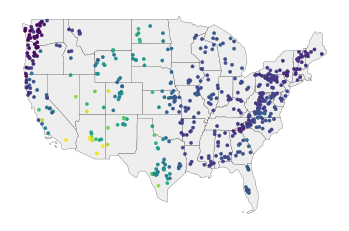

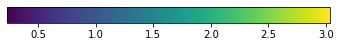

In [10]:
# draw the maps
attributes = load_attributes(db_path=CODE_DIR / "data" / "attributes.db",
                             basins=basins, drop_lat_lon=False)

data = attributes.copy()
data['color'] = data['aridity']
f, ax = plt.subplots(1)
collection = get_shape_collections(us_states)
ax.add_collection(collection)
mp = plt.scatter(x=data["gauge_lon"], y=data["gauge_lat"], s=10, linewidth=0.5, c=data['color'], cmap='viridis')
plt.axis(False)
f, ax = plt.subplots(1, figsize=(5,2))
plt.colorbar(mp, ax=ax, orientation='horizontal')
ax.remove()
plt.tight_layout()

In [9]:
# draw the maps
from shapely.ops import unary_union
from shapely.geometry import Polygon
shapefile = datautils.load_shape(CAMELS_DIR)
import folium
from pyproj import CRS, Transformer



In [10]:

incrs = CRS.from_proj4("+proj=aea +lon_0=-96 +lat_1=29.5 +lat_2=45.5 +lat_0=23 +datum=NAD83")
crs_4326 = CRS.from_epsg(4326)
transformer = Transformer.from_crs(incrs, crs_4326)

In [11]:
m = folium.Map(width=650, height=500, zoom_start=4, 
                location=[41.960781097662604, -78.16963195732737],              
                tiles='Stamen Terrain')
shapefile1=shapefile[0:200]
new_shape=datautils.create_shape(shapefile1, '02046000',transformer)
folium.GeoJson(new_shape,name='02046000',tooltip='02046000').add_to(m)

/home/jhbai/anaconda3/envs/ealstm/lib/python3.7/site-packages/fiona/collection.py:336: FionaDeprecationWarning: Collection slicing is deprecated and will be disabled in a future version.
  return self.session.__getitem__(item)


In [12]:
m

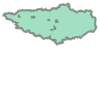

In [13]:
import re

filterlist=datautils.list_overlap(new_shape,CODE_DIR,0.0625)
new_shape

In [17]:
result=datautils.find_intersect(new_shape,filterlist)
in1980=result[(result['Year']==2008)]
g=in1980.groupby( ['Year', 'Mnth', 'Day'])
final=g.sum()
final

/home/jhbai/ealstm_regional_modeling/data/east/data_37.0625_-77.8125
/home/jhbai/ealstm_regional_modeling/data/east/data_37.0625_-77.5625
/home/jhbai/ealstm_regional_modeling/data/east/data_37.1875_-77.9375
/home/jhbai/ealstm_regional_modeling/data/east/data_37.0625_-77.6875
/home/jhbai/ealstm_regional_modeling/data/east/data_37.1875_-77.8125
/home/jhbai/ealstm_regional_modeling/data/east/data_37.1875_-77.5625
/home/jhbai/ealstm_regional_modeling/data/east/data_37.0625_-77.9375
/home/jhbai/ealstm_regional_modeling/data/east/data_37.1875_-77.6875


precipitation  max_temp  min_temp  wind_speed  weight  \
Year Mnth Day                                                          
2008 1    1             0.00    101.63      7.15       31.88     1.0   
          2             0.00     91.30    -24.10       86.13     1.0   
          3             0.00     18.53    -56.38       96.42     1.0   
          4             0.00     16.17    -77.25       36.92     1.0   
          5             0.00     63.31    -49.21       27.55     1.0   
          6             0.00     93.78     20.17       29.06     1.0   
          7             0.00    156.29     53.98       24.22     1.0   
          8             0.00    176.85     74.93       30.97     1.0   
          9             0.00    170.24     97.69       44.82     1.0   
          10           15.24    164.78     37.05        9.51     1.0   
          11            5.54    142.83     54.12       58.24     1.0   
          12            0.00    167.59     27.71       13.96     1.0   
          13            9.12     95.20      0.25       24.14     1.0   
          14            1.37     65.80     -7.34       52.65     1.0   
          15            0.00     69.41    -39.94       58.25     1.0   
          16            4.32     58.65    -48.29       52.64     1.0   
          17          122.74     38.81    -37.00       34.63     1.0   
          18            8.10     30.04     -3.49       44.55     1.0   
          19           21.56     86.24      5.36       28.53     1.0   
          20            4.71     28.40    -39.93       75.80     1.0   
          21            3.06     -7.38    -96.46       58.15     1.0   
          22           11.40     28.63    -84.10       22.40     1.0   
          23            5.38     40.86    -15.88       25.26     1.0   
          24            0.11     79.15    -28.31       28.18     1.0   
          25            0.00     37.86    -52.06       71.07     1.0   
          26            0.00     41.89    -46.11        7.41     1.0   
          27            0.00     57.46    -32.48       54.50     1.0   
          28            0.00     67.58    -42.29       55.73     1.0   
          29           19.05     97.50    -17.29       40.71     1.0   
          30            5.59    122.23     15.06       45.70     1.0   
...                      ...       ...       ...         ...     ...   
     12   2             0.00     81.51    -14.91       35.50     1.0   
          3             0.00     66.84    -41.06       17.92     1.0   
          4             2.55     87.62    -27.60       37.60     1.0   
          5             0.39    102.64     22.23       28.62     1.0   
          6             1.04     57.81    -42.83       21.27     1.0   
          7             0.40     41.09    -40.94       62.46     1.0   
          8             0.00     37.29    -59.31       35.42     1.0   
          9            46.01     50.75    -33.27       48.08     1.0   
          10          106.15    140.92     21.61       62.55     1.0   
          11          459.09    160.67     97.61       68.86     1.0   
          12           34.00    122.85     25.59       47.15     1.0   
          13            0.00     78.87    -33.67       54.04     1.0   
          14            0.00     48.41    -30.94       26.70     1.0   
          15           50.93    107.12    -10.17       48.57     1.0   
          16           57.22    165.94     44.13       11.32     1.0   
          17            5.60     56.72     21.60       27.10     1.0   
          18           11.32     97.17     29.23       16.41     1.0   
          19            4.52     80.30     54.55       24.68     1.0   
          20           92.20    144.60     47.76       29.84     1.0   
          21           15.36     83.75     19.05       33.61     1.0   
          22            0.00     81.52    -56.49       78.72     1.0   
          23            0.00      3.15    -68.31       28.82     1.0   
          24           23.40     44.50    -49.67       

In [239]:
basins = get_basin_list()
forcings = {}
discharge = {}
for basin in basins:
    forcings[basin] = datautils.load_forcing(CAMELS_DIR, basin)
    discharge[basin] = datautils.load_discharge(CAMELS_DIR, basin, forcings[basin][1])

In [331]:
forcings['02046000'][0]
new=pd.merge(forcings['02046000'][0],final,on=['Year', 'Mnth', 'Day'])
new['diffmax']=new['tmax(C)']-new['wmax']
new['diffmin']=new['tmin(C)']-new['wmin']
new[(new['diffmax']>0.1) | (new['diffmax']<-0.1)]
#new[(new['diffmin']>0.1) | (new['diffmin']<-0.1)]

,Year,Mnth,Day,Hr,dayl(s),prcp(mm/day),srad(W/m2),swe(mm),tmax(C),tmin(C),vp(Pa),precipitation,max_temp,min_temp,wind_speed,weight,wmin,wmax,diffmax,diffmin
2,2008,1,3,12,34214.40,0.00,250.77,0.0,6.36,-6.97,354.24,0.00,28.00,-84.19,145.89,1.0,-6.972797,2.332735,4.027265,0.002797
12,2008,1,13,12,34905.60,0.86,210.85,0.0,16.10,0.04,651.46,11.40,144.13,-0.38,34.72,1.0,0.040577,12.018121,4.081879,-0.000577
13,2008,1,14,12,34905.60,0.28,241.06,0.0,9.01,-0.95,558.30,1.37,97.28,-12.11,79.79,1.0,-0.944993,8.124535,0.885465,-0.005007
16,2008,1,17,12,35251.20,11.59,215.35,0.0,5.05,-4.67,439.21,174.19,59.03,-55.61,52.90,1.0,-4.670591,4.904223,0.145777,0.000591
17,2008,1,18,12,35251.20,4.00,100.60,0.0,3.98,-0.47,567.01,17.30,40.36,-5.68,66.71,1.0,-0.469026,3.441670,0.538330,-0.000974
19,2008,1,20,12,35251.20,0.75,246.43,0.0,7.28,-4.79,415.26,4.71,44.77,-57.92,114.49,1.0,-4.790358,3.677155,3.602845,0.000358
20,2008,1,21,12,35596.80,0.71,261.55,0.0,0.05,-12.04,251.31,10.82,-11.59,-144.09,88.08,1.0,-12.043424,-1.010338,1.060338,0.003424
24,2008,1,25,12,35942.40,0.00,316.47,0.0,6.15,-6.37,368.82,0.00,57.66,-76.68,107.44,1.0,-6.373459,4.775569,1.374431,0.003459
38,2008,2,8,12,37324.80,0.00,345.09,0.0,17.93,1.63,738.95,0.00,177.57,19.38,39.31,1.0,1.633001,14.769600,3.160400,-0.003001
42,2008,2,12,12,38016.00,6.88,267.85,0.0,9.02,-5.99,381.39,109.40,56.74,-71.82,61.23,1.0,-5.990278,4.725884,4.294116,0.000278


In [351]:
jan=in1980[(in1980['Mnth']==12)]
jan[(jan['Day']==17)]

,Year,Mnth,Day,precipitation,max_temp,min_temp,wind_speed,weight,wmin,wmax
21900,2008,12,17,1.33,6.22,2.56,3.33,0.303018,0.775725,1.884770
21900,2008,12,17,6.38,6.41,3.40,3.55,0.000000,0.000000,0.000000
21900,2008,12,17,0.55,5.81,1.56,2.91,0.000000,0.000000,0.000000
21900,2008,12,17,2.42,6.49,2.56,3.07,0.000000,0.000000,0.000000
21900,2008,12,17,2.08,7.18,3.58,3.84,0.000000,0.000000,0.000000
21900,2008,12,17,2.05,6.23,2.52,3.22,0.000000,0.000000,0.000000
21900,2008,12,17,0.30,6.61,1.68,3.07,0.000000,0.000000,0.000000
21900,2008,12,17,0.43,7.48,3.15,3.65,0.078875,0.248455,0.589982
21900,2008,12,17,0.93,5.93,1.95,2.96,0.000000,0.000000,0.000000
21900,2008,12,17,3.28,7.22,3.62,3.70,0.000000,0.000000,0.000000
